In [31]:
from keras.layers import Conv2D,Dense,Flatten,AveragePooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

In [14]:
def readdata(x):
    y=x[:,0]
    yout=to_categorical(y,num_classes=10)
    X=x[:,1:]
    num_imgs=x.shape[0]
    Xout=X.reshape(num_imgs,28,28,1)
    Xout=Xout/255
    return Xout,yout

In [35]:
def encode_preds(x):
    labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot ']
    return labels[x]

In [15]:
traindata=np.loadtxt('data/fashion-mnist_train.csv',skiprows=1,delimiter=',')
testdata=np.loadtxt('data/fashion-mnist_test.csv',skiprows=1,delimiter=',')
X_train,Y_train=readdata(traindata)
X_test,Y_test=readdata(testdata)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [67]:
mymodel=Sequential()
mymodel.add(Conv2D(30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),strides=1))
mymodel.add(Conv2D(12,kernel_size=(3,3),activation='relu'))
mymodel.add(Conv2D(12,kernel_size=(3,3),activation='relu'))
mymodel.add(Flatten())
mymodel.add(Dense(100,activation='relu'))
mymodel.add(Dense(10,activation='softmax'))
mymodel.compile(loss = categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
mymodel.fit(X_train,Y_train,batch_size=128,epochs=5,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 86s 2ms/step - loss: 0.5145 - acc: 0.8153 - val_loss: 0.3640 - val_acc: 0.8762
Epoch 2/5
48000/48000 [==============================] - 87s 2ms/step - loss: 0.3267 - acc: 0.8830 - val_loss: 0.3164 - val_acc: 0.8885
Epoch 3/5
48000/48000 [==============================] - 86s 2ms/step - loss: 0.2780 - acc: 0.8998 - val_loss: 0.2857 - val_acc: 0.9007
Epoch 4/5
48000/48000 [==============================] - 80s 2ms/step - loss: 0.2422 - acc: 0.9121 - val_loss: 0.2682 - val_acc: 0.9072
Epoch 5/5
48000/48000 [==============================] - 92s 2ms/step - loss: 0.2116 - acc: 0.9233 - val_loss: 0.2612 - val_acc: 0.9105


In [68]:
preds=mymodel.predict(X_test)

Pullover
Pullover


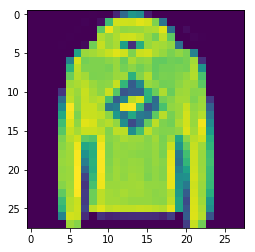

In [69]:
i=1000
print(encode_preds((np.argmax(preds[i]))))
plt.imshow(X_test[i,:,:].reshape(28,28))
print(encode_preds(np.argmax(Y_test[i])))